In [83]:
import pandas as pd
import numpy.linalg as la
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [40]:
# import datatable pca

pca = pd.read_csv('PCA.csv')
print(pca[0:3])

   Fech.  Abertura  Mínimo  Máximo      Volume  Negócios
0  19.34     18.42   18.42   19.63  1707747172     63308
1  18.29     18.40   18.00   18.46   725655241     38017
2  18.47     18.47   18.09   18.47   620941511     28838


In [41]:
# convert matrix to float
pca = pca.astype('float64')

pca.columns = ['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6']

# drops the empty line at file-end
pca.dropna(how="all", inplace=True)

pca.tail()

,col_1,col_2,col_3,col_4,col_5,col_6
491,4.72,4.74,4.66,4.86,245882432.0,28762.0
492,4.84,4.70,4.52,4.86,439826229.0,64685.0
493,4.60,4.67,4.35,5.13,618332894.0,59274.0
494,4.57,4.22,4.16,4.64,352368579.0,37197.0
495,4.20,4.23,4.12,4.31,302717532.0,52018.0


In [42]:
# split data table into data X and class labels y

X = pca.iloc[:,0:5].values
y = pca.iloc[:,5].values

In [88]:
# covariance matrix
cov_pca = np.cov(np.transpose(pca))

print('Covariance matrix \n%s' %cov_pca)

Covariance matrix 
[[ 1.07894376e+01  1.08032856e+01  1.07707313e+01  1.07885283e+01
   2.32275337e+08 -6.19186302e+03]
 [ 1.08032856e+01  1.09041167e+01  1.08254405e+01  1.08517217e+01
   2.32526714e+08 -6.03216803e+03]
 [ 1.07707313e+01  1.08254405e+01  1.07881053e+01  1.07871637e+01
   2.14504228e+08 -6.98598613e+03]
 [ 1.07885283e+01  1.08517217e+01  1.07871637e+01  1.08324079e+01
   2.51091718e+08 -5.24154435e+03]
 [ 2.32275337e+08  2.32526714e+08  2.14504228e+08  2.51091718e+08
   6.18734276e+16  2.35493166e+12]
 [-6.19186302e+03 -6.03216803e+03 -6.98598613e+03 -5.24154435e+03
   2.35493166e+12  1.91914485e+08]]


In [64]:
# eigenvectors and eigenvalues 

eig_vals, eig_vecs = la.eig(cov_pca)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.75404017e-09  1.46966043e-04  4.97988628e-01 -7.18671972e-01
  -4.69962084e-01 -1.21066395e-01]
 [-3.75810312e-09  1.45498301e-04  5.03104917e-01  6.82699520e-01
  -5.26452139e-01  6.04273520e-02]
 [-3.46682309e-09  1.48117208e-04  5.01506296e-01 -7.73578147e-02
   4.62407102e-01  7.27110184e-01]
 [-4.05815108e-09  1.44676763e-04  4.97377238e-01  1.06994063e-01
   5.36808585e-01 -6.73054413e-01]
 [-9.99999999e-01  3.80604650e-05 -1.86548514e-08  5.25478975e-11
  -5.73825660e-11  3.87688420e-10]
 [-3.80604688e-05 -9.99999956e-01  2.92628982e-04 -2.26722601e-06
   4.87817620e-07  1.32162421e-06]]

Eigenvalues 
[6.18734277e+16 1.02284691e+08 3.09862111e+01 4.35754197e-02
 5.42861623e-03 1.08651286e-02]


In [45]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.187342767037002e+16
102284690.92615782
30.98621107723157
0.04357541966895491
0.010865128564199342
0.005428616234081154


In [81]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1), 
                      eig_pairs[1][1].reshape(6,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-3.75404017e-09  1.46966043e-04]
 [-3.75810312e-09  1.45498301e-04]
 [-3.46682309e-09  1.48117208e-04]
 [-4.05815108e-09  1.44676763e-04]
 [-9.99999999e-01  3.80604650e-05]
 [-3.80604688e-05 -9.99999956e-01]]


In [73]:
Y = pca.dot(matrix_w)

In [74]:
Y[0:10]

,0,1
0,24.567540,-0.702223
1,34.161925,-0.048231
2,33.604267,-0.120387
3,33.869557,-0.082173
4,33.748607,-0.031203
5,34.147711,-0.455372
6,27.512347,-0.305952
7,33.596842,-0.122890
8,30.438534,-0.295985
9,31.757682,-0.366056


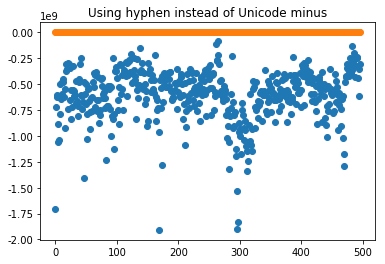

In [67]:
# Fixing random state for reproducibility
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(Y, 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

<IPython.core.display.Javascript object>


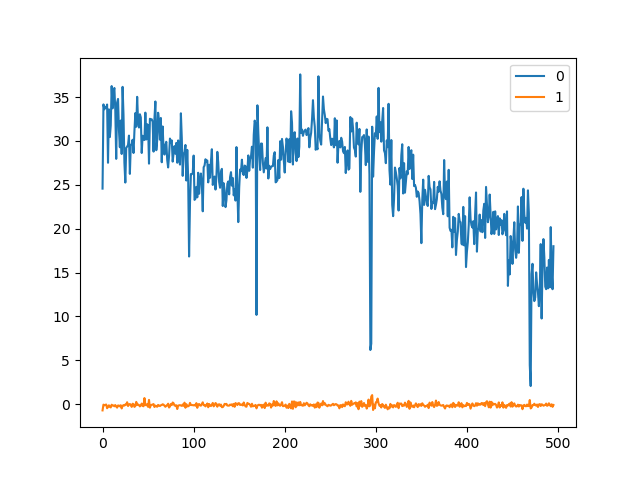

In [86]:
Y.plot()